In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Data = pd.read_csv("E:\\Data science masters\\machine learning\\data_stocks.csv")
Data.head()


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [23]:
data = Data.drop("DATE",axis=1)

In [24]:
data.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [25]:
data.dtypes

SP500           float64
NASDAQ.AAL      float64
NASDAQ.AAPL     float64
NASDAQ.ADBE     float64
NASDAQ.ADI      float64
NASDAQ.ADP      float64
NASDAQ.ADSK     float64
NASDAQ.AKAM     float64
NASDAQ.ALXN     float64
NASDAQ.AMAT     float64
NASDAQ.AMD      float64
NASDAQ.AMGN     float64
NASDAQ.AMZN     float64
NASDAQ.ATVI     float64
NASDAQ.AVGO     float64
NASDAQ.BBBY     float64
NASDAQ.BIIB     float64
NASDAQ.CA       float64
NASDAQ.CBOE     float64
NASDAQ.CELG     float64
NASDAQ.CERN     float64
NASDAQ.CHRW     float64
NASDAQ.CHTR     float64
NASDAQ.CINF     float64
NASDAQ.CMCSA    float64
NASDAQ.CME      float64
NASDAQ.COST     float64
NASDAQ.CSCO     float64
NASDAQ.CSX      float64
NASDAQ.CTAS     float64
                 ...   
NYSE.USB        float64
NYSE.UTX        float64
NYSE.V          float64
NYSE.VAR        float64
NYSE.VFC        float64
NYSE.VLO        float64
NYSE.VMC        float64
NYSE.VNO        float64
NYSE.VTR        float64
NYSE.VZ         float64
NYSE.WAT        

In [26]:

from math import sqrt
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = data.pct_change().mean() * 252
returns = pd.DataFrame(returns)
#print(returns)
returns.columns = ['Returns']
returns['Volatility'] = data.pct_change().std() * sqrt(252)
#print(returns['Volatility'])
#format the data as a numpy array to feed into the K-Means algorithm
dataa = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
#removing NaN values, replacing them by 0
cleaned_data = np.where(np.isnan(dataa), 0, dataa)
#cleaned_data

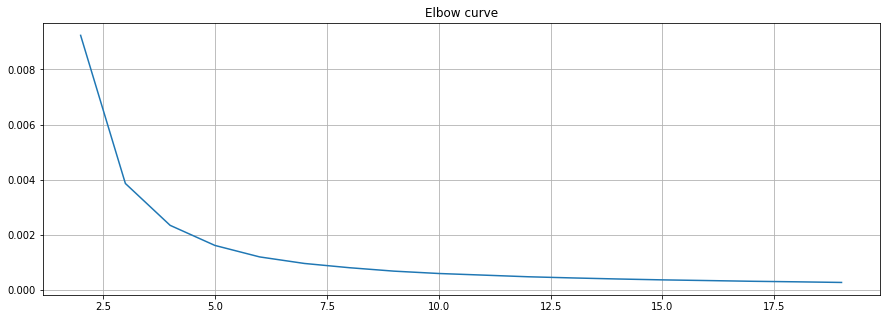

In [27]:
from sklearn.cluster import KMeans
X = cleaned_data
#within cluster sum of squares.we calculate the sum of squares of the distance of each data point 
# in cluster k from their center point ki.
wcss = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [28]:
#So we can sort of see that once the number of clusters reaches 5 (on the bottom axis), the reduction in the SSE begins to slow down for each increase in cluster number. This would lead me to believe that the optimal number of clusters for this exercise lies around the 5 mark – so let’s use 5.
from scipy.cluster.vq import kmeans,vq
centroids,_ = kmeans(cleaned_data,5)
# assign each sample to a cluster
idx,_ = vq(cleaned_data,centroids)
 
data = cleaned_data


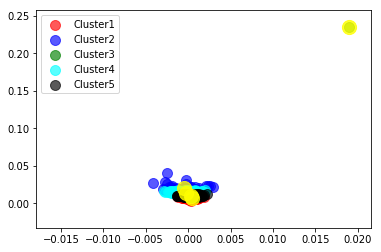

In [29]:
#using scatter plt 
plt.scatter(X[idx==0,0],X[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
plt.scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue',label='Cluster2',alpha=0.65)
plt.scatter(X[idx==2,0],X[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
plt.scatter(X[idx==3,0],X[idx==3,1],s=100,c='cyan',label='Cluster4',alpha=0.65)
plt.scatter(X[idx==4,0],X[idx==4,1],s=100,c='black',label='Cluster5',alpha=0.65)
#plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,c='yellow')
plt.scatter(centroids[:,0],centroids[:,1],s=200, c='yellow', alpha = 0.8)
plt.legend()
plt.show()

In [30]:
print(returns.idxmax())

Returns       NYSE.XRX
Volatility    NYSE.XRX
dtype: object


In [31]:
#drop the relevant stock from our data
returns.drop('NYSE.XRX',inplace=True)
#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

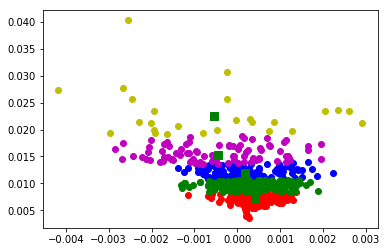

In [32]:
from pylab import plot,show
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [33]:
#problem 1
#the details of which stock is actually in which cluster 
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
for detail in details:
    print(detail)

('SP500', 2)
('NASDAQ.AAL', 4)
('NASDAQ.AAPL', 3)
('NASDAQ.ADBE', 3)
('NASDAQ.ADI', 0)
('NASDAQ.ADP', 0)
('NASDAQ.ADSK', 4)
('NASDAQ.AKAM', 4)
('NASDAQ.ALXN', 4)
('NASDAQ.AMAT', 0)
('NASDAQ.AMD', 1)
('NASDAQ.AMGN', 3)
('NASDAQ.AMZN', 3)
('NASDAQ.ATVI', 0)
('NASDAQ.AVGO', 0)
('NASDAQ.BBBY', 4)
('NASDAQ.BIIB', 0)
('NASDAQ.CA', 4)
('NASDAQ.CBOE', 2)
('NASDAQ.CELG', 3)
('NASDAQ.CERN', 3)
('NASDAQ.CHRW', 0)
('NASDAQ.CHTR', 4)
('NASDAQ.CINF', 3)
('NASDAQ.CMCSA', 3)
('NASDAQ.CME', 2)
('NASDAQ.COST', 3)
('NASDAQ.CSCO', 3)
('NASDAQ.CSX', 0)
('NASDAQ.CTAS', 3)
('NASDAQ.CTSH', 2)
('NASDAQ.CTXS', 0)
('NASDAQ.DISCA', 4)
('NASDAQ.DISCK', 4)
('NASDAQ.DISH', 0)
('NASDAQ.DLTR', 4)
('NASDAQ.EA', 4)
('NASDAQ.EBAY', 3)
('NASDAQ.EQIX', 3)
('NASDAQ.ESRX', 4)
('NASDAQ.ETFC', 0)
('NASDAQ.EXPD', 3)
('NASDAQ.EXPE', 0)
('NASDAQ.FAST', 4)
('NASDAQ.FB', 3)
('NASDAQ.FFIV', 4)
('NASDAQ.FISV', 2)
('NASDAQ.FITB', 0)
('NASDAQ.FLIR', 0)
('NASDAQ.FOX', 0)
('NASDAQ.FOXA', 0)
('NASDAQ.GILD', 3)
('NASDAQ.GOOG', 3)
('NASDAQ.

In [35]:
#stocks in a cluster behave similarily
#under cluster 0
details = [(name,cluster) for name, cluster in zip(returns.index,idx) if cluster == 0]
for detail in details:
    print(detail)

('NASDAQ.ADI', 0)
('NASDAQ.ADP', 0)
('NASDAQ.AMAT', 0)
('NASDAQ.ATVI', 0)
('NASDAQ.AVGO', 0)
('NASDAQ.BIIB', 0)
('NASDAQ.CHRW', 0)
('NASDAQ.CSX', 0)
('NASDAQ.CTXS', 0)
('NASDAQ.DISH', 0)
('NASDAQ.ETFC', 0)
('NASDAQ.EXPE', 0)
('NASDAQ.FITB', 0)
('NASDAQ.FLIR', 0)
('NASDAQ.FOX', 0)
('NASDAQ.FOXA', 0)
('NASDAQ.HAS', 0)
('NASDAQ.HBAN', 0)
('NASDAQ.HOLX', 0)
('NASDAQ.IDXX', 0)
('NASDAQ.INTU', 0)
('NASDAQ.KLAC', 0)
('NASDAQ.LKQ', 0)
('NASDAQ.LRCX', 0)
('NASDAQ.MCHP', 0)
('NASDAQ.NTAP', 0)
('NASDAQ.NTRS', 0)
('NASDAQ.NWSA', 0)
('NASDAQ.PCAR', 0)
('NASDAQ.PCLN', 0)
('NASDAQ.PYPL', 0)
('NASDAQ.ROST', 0)
('NASDAQ.SRCL', 0)
('NASDAQ.SWKS', 0)
('NASDAQ.SYMC', 0)
('NASDAQ.XLNX', 0)
('NASDAQ.XRAY', 0)
('NASDAQ.ZION', 0)
('NYSE.ABC', 0)
('NYSE.ADM', 0)
('NYSE.AES', 0)
('NYSE.ALB', 0)
('NYSE.ALK', 0)
('NYSE.AMG', 0)
('NYSE.AMP', 0)
('NYSE.BAC', 0)
('NYSE.BF.B', 0)
('NYSE.BWA', 0)
('NYSE.CAT', 0)
('NYSE.CBS', 0)
('NYSE.CFG', 0)
('NYSE.CMA', 0)
('NYSE.CMI', 0)
('NYSE.CNC', 0)
('NYSE.COF', 0)
('NYSE.COL'

In [36]:
#under cluster 1
details = [(name,cluster) for name, cluster in zip(returns.index,idx) if cluster == 1]
for detail in details:
    print(detail)

('NASDAQ.AMD', 1)
('NASDAQ.INCY', 1)
('NASDAQ.NVDA', 1)
('NASDAQ.NWS', 1)
('NASDAQ.STX', 1)
('NASDAQ.VRTX', 1)
('NASDAQ.WFM', 1)
('NYSE.AAP', 1)
('NYSE.AYI', 1)
('NYSE.BHI', 1)
('NYSE.BLL', 1)
('NYSE.CHK', 1)
('NYSE.FCX', 1)
('NYSE.FL', 1)
('NYSE.JWN', 1)
('NYSE.KORS', 1)
('NYSE.KR', 1)
('NYSE.LB', 1)
('NYSE.MRO', 1)
('NYSE.NFX', 1)
('NYSE.NRG', 1)
('NYSE.PRGO', 1)
('NYSE.RIG', 1)
('NYSE.RRC', 1)
('NYSE.SIG', 1)
('NYSE.SYF', 1)


In [37]:
#under cluster 2
details = [(name,cluster) for name, cluster in zip(returns.index,idx) if cluster == 2]
for detail in details:
    print(detail)

('SP500', 2)
('NASDAQ.CBOE', 2)
('NASDAQ.CME', 2)
('NASDAQ.CTSH', 2)
('NASDAQ.FISV', 2)
('NASDAQ.INFO', 2)
('NASDAQ.KHC', 2)
('NASDAQ.MSFT', 2)
('NASDAQ.NDAQ', 2)
('NASDAQ.PAYX', 2)
('NYSE.ABBV', 2)
('NYSE.ABT', 2)
('NYSE.ACN', 2)
('NYSE.AEE', 2)
('NYSE.AEP', 2)
('NYSE.AFL', 2)
('NYSE.AIG', 2)
('NYSE.AJG', 2)
('NYSE.ALL', 2)
('NYSE.AME', 2)
('NYSE.AON', 2)
('NYSE.APD', 2)
('NYSE.APH', 2)
('NYSE.AVY', 2)
('NYSE.AWK', 2)
('NYSE.AXP', 2)
('NYSE.BAX', 2)
('NYSE.BK', 2)
('NYSE.BRK.B', 2)
('NYSE.BSX', 2)
('NYSE.CB', 2)
('NYSE.CCL', 2)
('NYSE.CHD', 2)
('NYSE.CL', 2)
('NYSE.CLX', 2)
('NYSE.CMS', 2)
('NYSE.CNP', 2)
('NYSE.CVX', 2)
('NYSE.D', 2)
('NYSE.DD', 2)
('NYSE.DGX', 2)
('NYSE.DHR', 2)
('NYSE.DOW', 2)
('NYSE.DPS', 2)
('NYSE.DTE', 2)
('NYSE.DUK', 2)
('NYSE.ECL', 2)
('NYSE.ED', 2)
('NYSE.EIX', 2)
('NYSE.EQR', 2)
('NYSE.ES', 2)
('NYSE.ETR', 2)
('NYSE.EXC', 2)
('NYSE.FDX', 2)
('NYSE.FIS', 2)
('NYSE.GD', 2)
('NYSE.GIS', 2)
('NYSE.HD', 2)
('NYSE.HIG', 2)
('NYSE.HON', 2)
('NYSE.HRS', 2)
('NYSE.HS

In [38]:
#under cluster 3
details = [(name,cluster) for name, cluster in zip(returns.index,idx) if cluster == 3]
for detail in details:
    print(detail)

('NASDAQ.AAPL', 3)
('NASDAQ.ADBE', 3)
('NASDAQ.AMGN', 3)
('NASDAQ.AMZN', 3)
('NASDAQ.CELG', 3)
('NASDAQ.CERN', 3)
('NASDAQ.CINF', 3)
('NASDAQ.CMCSA', 3)
('NASDAQ.COST', 3)
('NASDAQ.CSCO', 3)
('NASDAQ.CTAS', 3)
('NASDAQ.EBAY', 3)
('NASDAQ.EQIX', 3)
('NASDAQ.EXPD', 3)
('NASDAQ.FB', 3)
('NASDAQ.GILD', 3)
('NASDAQ.GOOG', 3)
('NASDAQ.GOOGL', 3)
('NASDAQ.GRMN', 3)
('NASDAQ.HSIC', 3)
('NASDAQ.INTC', 3)
('NASDAQ.ISRG', 3)
('NASDAQ.JBHT', 3)
('NASDAQ.MAR', 3)
('NASDAQ.MDLZ', 3)
('NASDAQ.MNST', 3)
('NASDAQ.PBCT', 3)
('NASDAQ.QCOM', 3)
('NASDAQ.SBUX', 3)
('NASDAQ.SNPS', 3)
('NASDAQ.TROW', 3)
('NASDAQ.TXN', 3)
('NASDAQ.VRSK', 3)
('NASDAQ.VRSN', 3)
('NASDAQ.WBA', 3)
('NASDAQ.WLTW', 3)
('NYSE.A', 3)
('NYSE.AET', 3)
('NYSE.AGN', 3)
('NYSE.AIV', 3)
('NYSE.AIZ', 3)
('NYSE.ALLE', 3)
('NYSE.AMT', 3)
('NYSE.ANTM', 3)
('NYSE.ARE', 3)
('NYSE.AVB', 3)
('NYSE.BA', 3)
('NYSE.BBT', 3)
('NYSE.BDX', 3)
('NYSE.BEN', 3)
('NYSE.BLK', 3)
('NYSE.BMY', 3)
('NYSE.BXP', 3)
('NYSE.C', 3)
('NYSE.CAG', 3)
('NYSE.CBG', 3)
('

In [39]:
#under cluster 4
details = [(name,cluster) for name, cluster in zip(returns.index,idx) if cluster == 4]
for detail in details:
    print(detail)

('NASDAQ.AAL', 4)
('NASDAQ.ADSK', 4)
('NASDAQ.AKAM', 4)
('NASDAQ.ALXN', 4)
('NASDAQ.BBBY', 4)
('NASDAQ.CA', 4)
('NASDAQ.CHTR', 4)
('NASDAQ.DISCA', 4)
('NASDAQ.DISCK', 4)
('NASDAQ.DLTR', 4)
('NASDAQ.EA', 4)
('NASDAQ.ESRX', 4)
('NASDAQ.FAST', 4)
('NASDAQ.FFIV', 4)
('NASDAQ.GT', 4)
('NASDAQ.ILMN', 4)
('NASDAQ.MAT', 4)
('NASDAQ.MU', 4)
('NASDAQ.MYL', 4)
('NASDAQ.NAVI', 4)
('NASDAQ.NFLX', 4)
('NASDAQ.ORLY', 4)
('NASDAQ.PDCO', 4)
('NASDAQ.QRVO', 4)
('NASDAQ.REGN', 4)
('NASDAQ.SNI', 4)
('NASDAQ.SPLS', 4)
('NASDAQ.TRIP', 4)
('NASDAQ.TSCO', 4)
('NASDAQ.ULTA', 4)
('NASDAQ.VIAB', 4)
('NASDAQ.WDC', 4)
('NASDAQ.WYNN', 4)
('NYSE.ADS', 4)
('NYSE.AN', 4)
('NYSE.APA', 4)
('NYSE.APC', 4)
('NYSE.ARNC', 4)
('NYSE.AZO', 4)
('NYSE.BBY', 4)
('NYSE.BCR', 4)
('NYSE.CAH', 4)
('NYSE.CF', 4)
('NYSE.CMG', 4)
('NYSE.COG', 4)
('NYSE.COH', 4)
('NYSE.COTY', 4)
('NYSE.CTL', 4)
('NYSE.CXO', 4)
('NYSE.DG', 4)
('NYSE.DVN', 4)
('NYSE.EQT', 4)
('NYSE.EVHC', 4)
('NYSE.FLR', 4)
('NYSE.FLS', 4)
('NYSE.FTI', 4)
('NYSE.GGP', 4)


In [ ]:
#unique values based on timeperiods

In [41]:
Data["DATE"].value_counts(dropna=False)


1501257840    1
1496334120    1
1498744560    1
1500578400    1
1495217580    1
1500488400    1
1503584340    1
1503669540    1
1499968860    1
1494964200    1
1494513060    1
1494529140    1
1499100360    1
1493915040    1
1502737500    1
1491842460    1
1502819040    1
1497457260    1
1491244440    1
1494341040    1
1499273820    1
1499441340    1
1492800960    1
1503497940    1
1497291840    1
1492522440    1
1502132280    1
1500321540    1
1493398980    1
1498834320    1
             ..
1496172120    1
1502736480    1
1494600300    1
1501509840    1
1495722600    1
1493404260    1
1499696700    1
1502993280    1
1491577440    1
1496686500    1
1493060220    1
1503414660    1
1498578900    1
1492716180    1
1502894580    1
1501178280    1
1493838480    1
1501525260    1
1502808900    1
1499277180    1
1494608520    1
1497449640    1
1499780700    1
1502300880    1
1495567620    1
1494256260    1
1497551760    1
1500664860    1
1503949260    1
1495203840    1
Name: DATE, Length: 4126

In [42]:
Data["DATE"].unique()

array([1491226200, 1491226260, 1491226320, ..., 1504209480, 1504209540,
       1504209600], dtype=int64)